# Visualization of the computational experiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('..'))
from constants.constants import RESULTS_FILE, RESULTS_BACKUP_FILE

### Fetching the results file

In [2]:
column_names = [
    'NumProducts',
    'Run',
    'Approach',
    'Time',
    'OptValue',
    'C',
    'ClingoStats_Constraints',
    'ClingoStats_Complexity',
    'ClingoStats_Vars',
    'ClingoStats_Atoms',
    'ClingoStats_Bodies',
    'ClingoStats_Rules',
    'ClingoStats_Choices',
    'ClingoStats_Conflicts',
    'ClingoStats_Restarts',
    'ClingoStats_Models',
    'Variables',
    'Constraints',
    'Timeout'
]

In [3]:
df = pd.read_csv(RESULTS_FILE, names=column_names)
df = df.sort_values(by=['NumProducts', 'Run', 'Approach'])
df[['NumProducts', 'Run', 'Approach', 'Time', 'OptValue', 'C', 'Timeout']]

,NumProducts,Run,Approach,Time,OptValue,C,Timeout
216,6,0,asp,0.327961,480.0,480,False
0,6,0,clingo,0.072198,480.0,480,False
155,6,0,clingo-bad,0.037245,480.0,480,False
237,6,0,concorde,0.045954,NaN,480,False
556,6,0,ilp,0.604467,NaN,480,False
...,...,...,...,...,...,...,...
495,70,3,concorde,0.532489,NaN,3780,False
497,71,0,concorde,0.378359,NaN,3810,False
496,71,1,concorde,0.315994,NaN,3810,False
498,71,2,concorde,0.483877,NaN,3810,False


### Get Approaches, Runs and NumProducts

In [4]:
approaches = df['Approach'].drop_duplicates().to_list()
approaches

['asp', 'clingo', 'clingo-bad', 'concorde', 'ilp', 'pddl']

In [5]:
runs = df['Run'].drop_duplicates().to_list()
runs

[0, 1, 2, 3]

In [6]:
numProducts = df['NumProducts'].drop_duplicates().to_list()
numProducts

[6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71]

### Check data sanity

In [7]:
for numProduct in numProducts:
    for run in runs:
        df_temp_numProduct = df[df['NumProducts'] == numProduct]
        df_temp_run = df_temp_numProduct[df_temp_numProduct['Run'] == run]
        df_temp_run_woT = df_temp_run[df_temp_run['Timeout'] == False]
        if len(df_temp_run_woT['C'].drop_duplicates().to_list()) > 1:
            print('ERROR')
            print(f'numProduct: {numProduct} run: {run}')
            print(df_temp_run_woT[['Approach', 'C']])
            print()

### Preprocessing the data for plotting

In [8]:
metrics = {
    'Time': 'Computation time (in sec)',
    'ClingoStats_Constraints': 'Number of constraints (clingo)',
    'ClingoStats_Complexity': 'Degree of complexity (clingo)',
    'ClingoStats_Vars': 'Number of variables (clingo)',
    'ClingoStats_Atoms': 'Number of atoms (clingo)',
    'ClingoStats_Bodies': 'Number of bodies (clingo)',
    'ClingoStats_Rules': 'Number of rules (clingo)',
    'ClingoStats_Choices': 'Number of choices (clingo)',
    'ClingoStats_Conflicts': 'Number of conflicts (clingo)',
    'ClingoStats_Restarts': 'Number of restarts (clingo)',
    'ClingoStats_Models': 'Number of models (clingo)',
    'Variables': 'Number of variables (docplex)',
    'Constraints': 'Number of constraints (docplex)'
}

In [9]:
data = {}
for approach in approaches:
    df_approach = df[df['Approach'] == approach]
    
    data[approach] = {}
    for metric in metrics:
        data[approach][metric] = {'numProducts': [], 'lbs': [], 'ubs': [], 'means': []}
    
        for numProduct in numProducts:
            df_numProduct = df_approach[df_approach['NumProducts'] == numProduct]
            if metric != 'Time':
                df_numProduct = df_numProduct[df_numProduct['Timeout'] == False]
            
            if not df_numProduct.empty:
                values = df_numProduct[metric].to_list()
                lb = min(values)
                ub = max(values)
                mean = float(sum(values)) / len(values)
                if not pd.isna(mean):
                    data[approach][metric]['lbs'].append(lb)
                    data[approach][metric]['ubs'].append(ub)
                    data[approach][metric]['means'].append(mean)
                    data[approach][metric]['numProducts'].append(numProduct)

## Creating plots

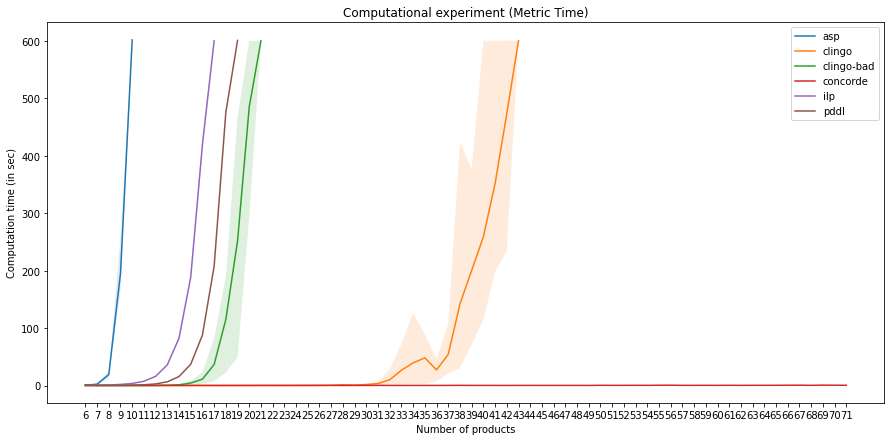

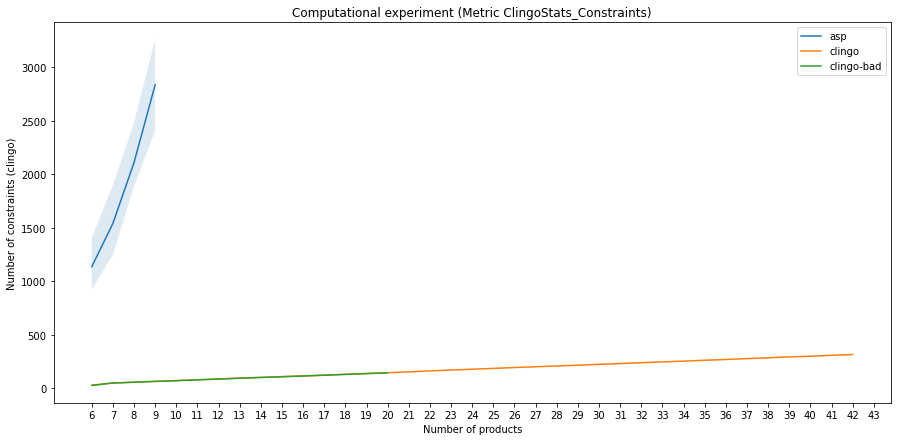

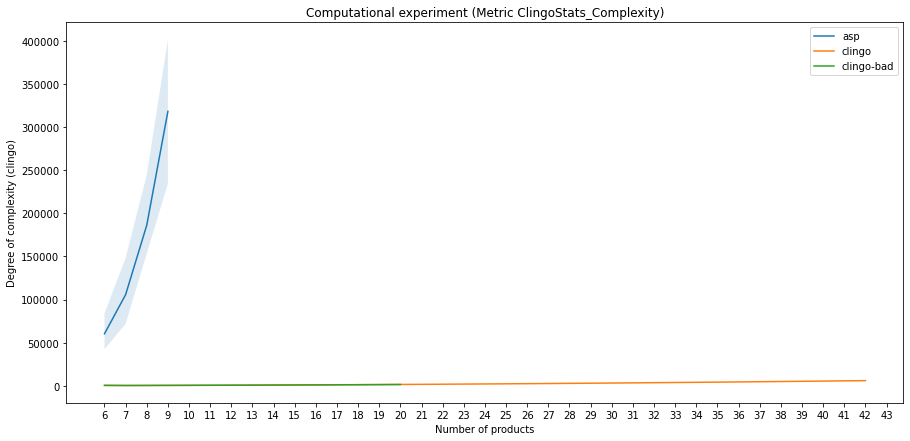

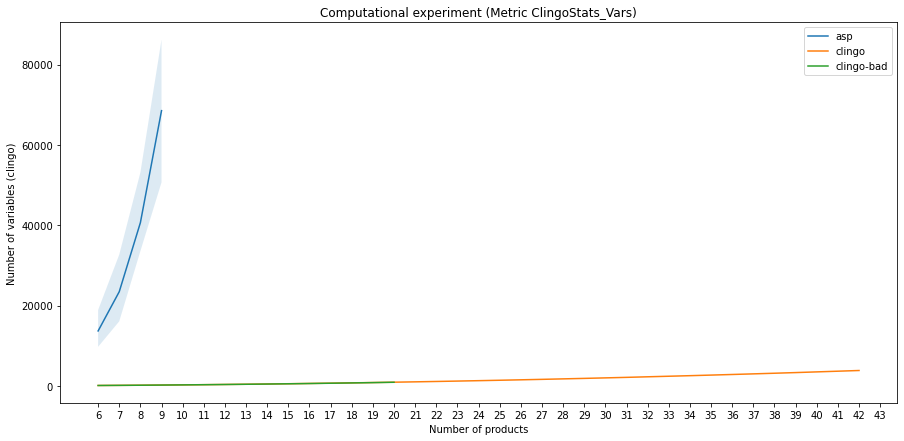

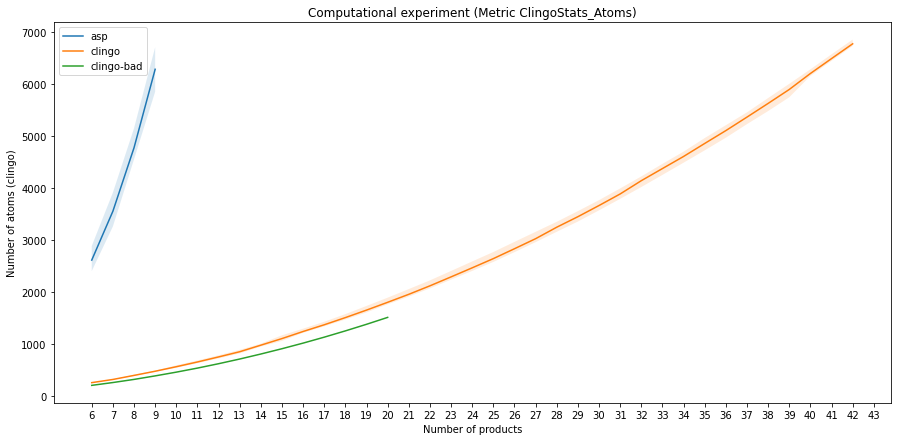

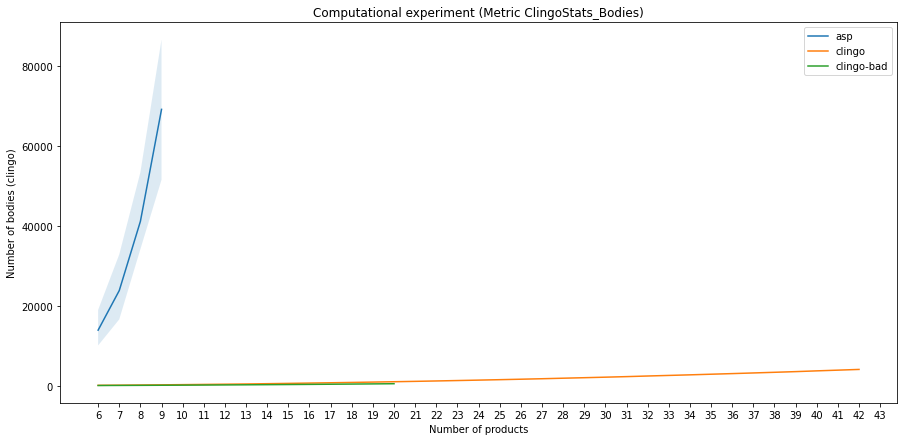

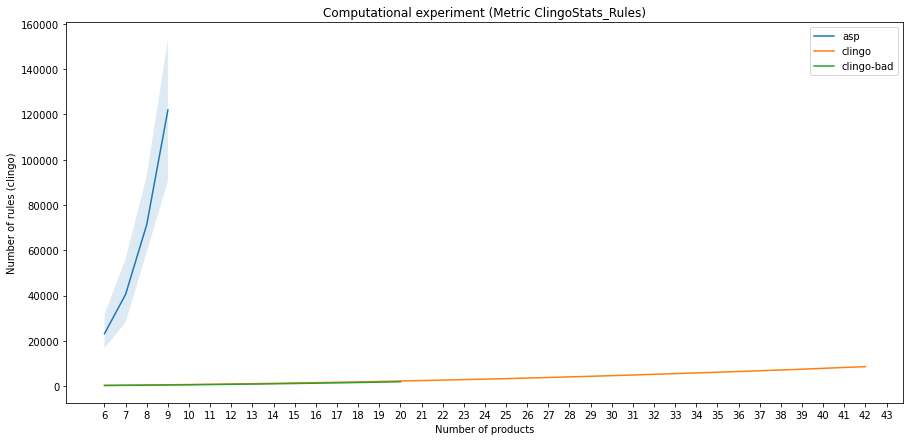

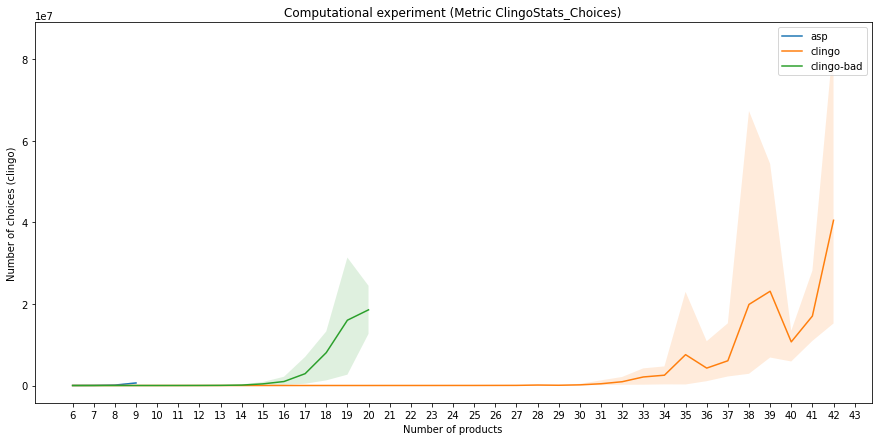

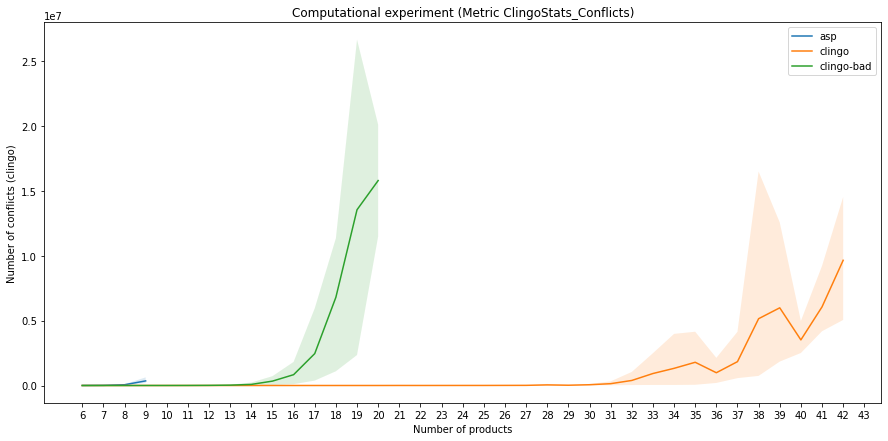

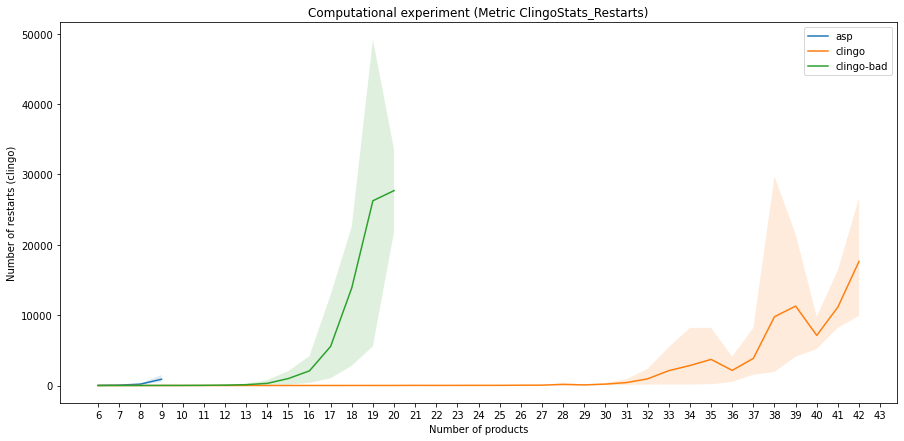

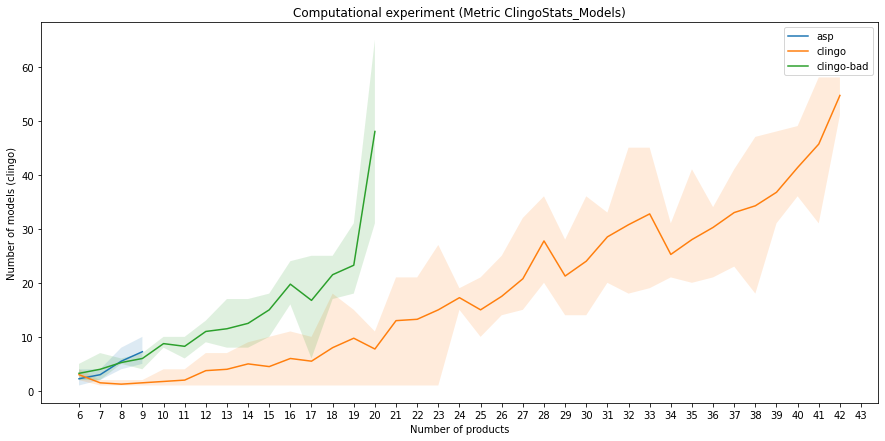

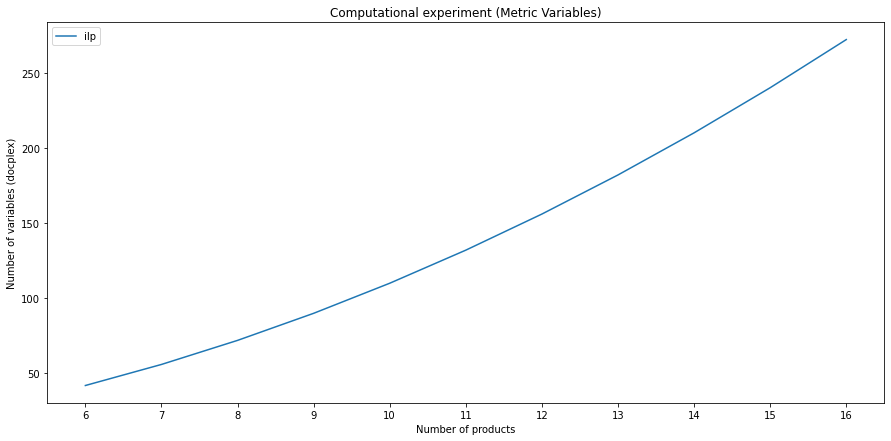

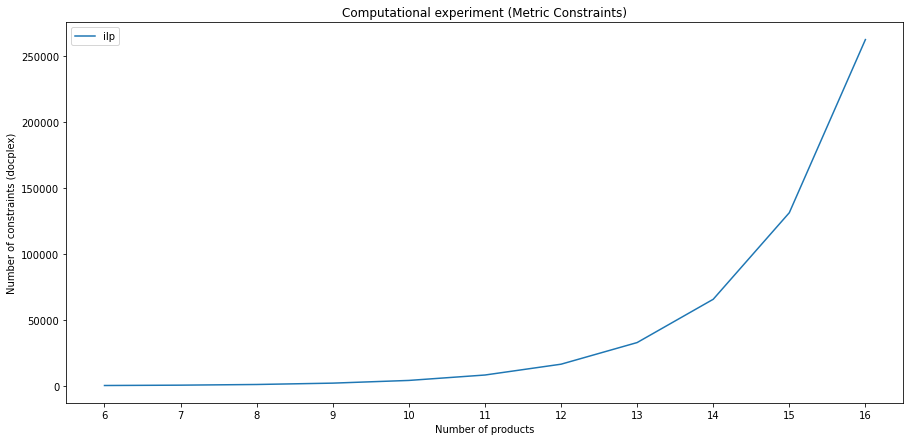

In [10]:
for metric, ylabel in metrics.items():
    plt.figure(figsize=(15, 7))
    plt.title(f'Computational experiment (Metric {metric})')
    plt.xticks(numProducts)
    plt.xlabel('Number of products')
    plt.ylabel(ylabel)

    for approach in approaches:
        if len(data[approach][metric]['numProducts']) > 0:
            plt.plot(data[approach][metric]['numProducts'], data[approach][metric]['means'], label=approach)
            plt.fill_between(data[approach][metric]['numProducts'], data[approach][metric]['lbs'], data[approach][metric]['ubs'], alpha=0.15)

    plt.legend()
    plt.show()